In [2]:
%load_ext autoreload

In [75]:
%autoreload 1
%aimport MLP
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def task(rng, func, low, high):
    approximator = MLP.MLP(
        rng=rng,
        structure=[1, 10, 1],
        act_func=[MLP.Sigmoid(), MLP.Identity()]
    )
    x = rng.uniform(
        low=low,
        high=high,
        size=(1000, 1, 1)
    )
    y = func(x)
    x_train = x[:900]
    y_train = y[:900]
    x_test = x[900:]
    y_test = y[900:]
    evs = approximator.train(x_train, y_train)

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(evs)
    plt.yscale('log')
    plt.subplot(122)
    plt.scatter(x_train, y_train, c='b')
    plt.scatter(x_test, approximator.transform(x_test), c='r')
    plt.show()

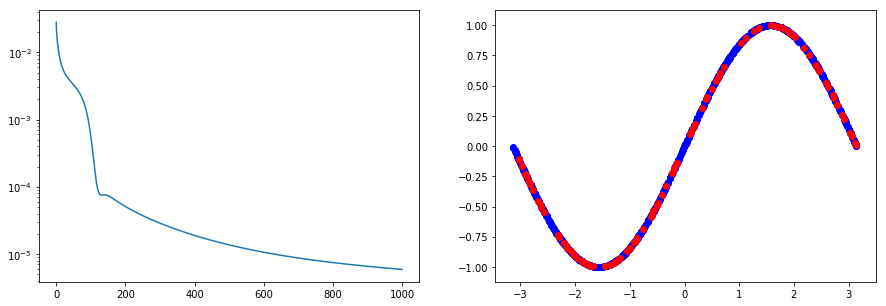

In [77]:
rng = np.random.RandomState(1234)
task(rng, np.sin, -np.pi, np.pi)

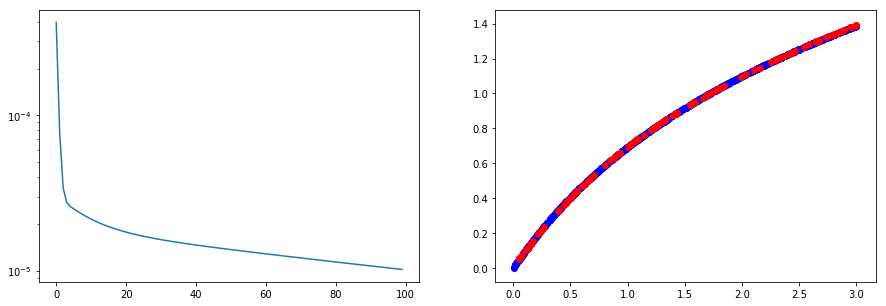

In [55]:
rng = np.random.RandomState(1234)
task(rng, lambda x: np.log(1+x), 0., 3.)

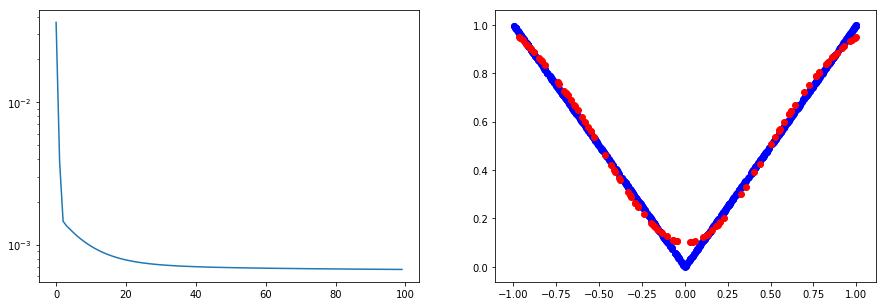

In [56]:
rng = np.random.RandomState(1234)
task(rng, np.abs, -1., 1.)

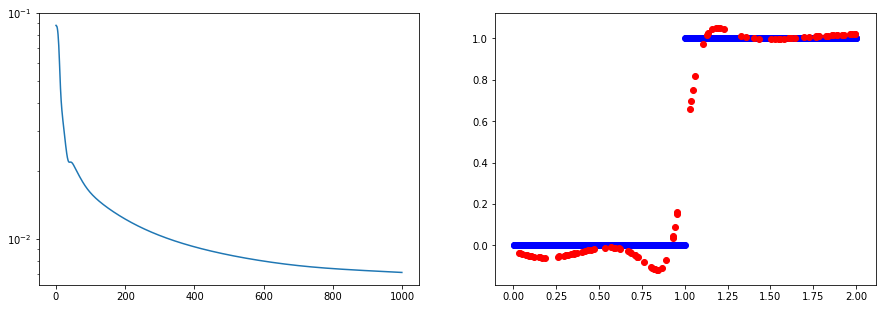

In [68]:
rng = np.random.RandomState(1234)
task(rng, lambda x: np.heaviside(x-1, 0.5), 0, 2)

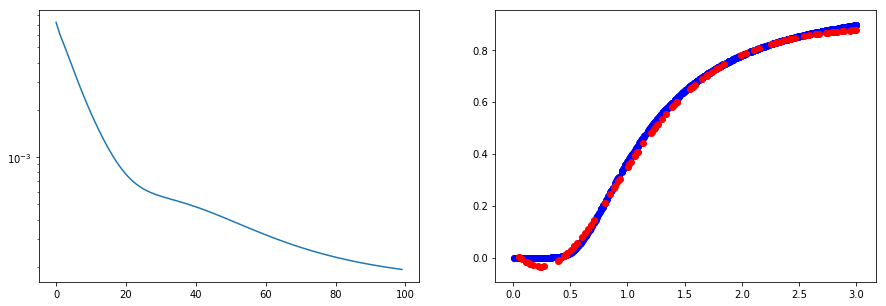

In [58]:
rng = np.random.RandomState(1234)
task(rng, lambda x: np.exp(-1/x**2), 0., 3.)

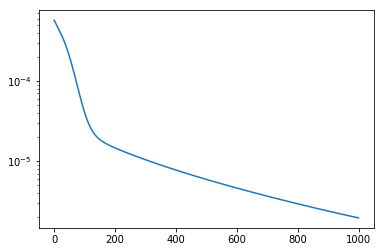

In [80]:
approximator = MLP.MLP(
    rng=np.random.RandomState(1234),
    structure=[2, 10, 1],
    act_func=[MLP.Sigmoid(), MLP.Identity()]
)
x = rng.uniform(
    low=0.0,
    high=1.0,
    size=(1000, 1, 2)
)
y = np.array([np.log(np.exp(a[0,0]) + 0.5*np.exp(a[0,1])) for a in x])
y = y.reshape((y.size,1,1))
x_train = x[:900]
y_train = y[:900]
x_test = x[900:]
y_test = y[900:]
evs = approximator.train(x_train, y_train)
plt.plot(evs)
plt.yscale('log')
plt.show()